Well this idea went pretty much nowhere

The model simply learned to generate a black image, as it was the closest way of getting the right results
It explains why all the accuracies tested generated approx the same avg.

In [1]:
import os
from lib.train_AI_lib import *
from lib.SemiSup import *
from lib.AutoEncoders import *
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
os.chdir('..')
print(os.getcwd())

c:\Users\kevin\Documents\GitHub\APS360-2020Summer-Project


In [3]:
batchsize=16; epoch=15; lr=0.01
enc = autEncE('autEncE'); enc.cuda()
enc.load_state_dict(torch.load('saved/TrainingRuns/AutoEncTrainer/autEncE_b64_te15_lr0.001/model_epoch14'))

net = semiSupB('semiSupB', enc); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize=batchsize, preCalc=0)
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr)

Epoch 0 | Time Taken: 91.37s | Training Error: 72.9652052561, Training loss: 5323.9211780637 | Validation Error: 21.6254636281, Validation loss: 467.6606771296
Epoch 1 | Time Taken: 90.59s | Training Error: 21.8026658703, Training loss: 475.3562390527 | Validation Error: 22.8733846792, Validation loss: 523.1917266846
Epoch 2 | Time Taken: 89.28s | Training Error: 21.6128313339, Training loss: 467.1144782665 | Validation Error: 20.8803482473, Validation loss: 435.9889429266
Epoch 3 | Time Taken: 87.44s | Training Error: 21.2704890530, Training loss: 452.4337045536 | Validation Error: 20.9993216995, Validation loss: 440.9715118408
Epoch 4 | Time Taken: 87.20s | Training Error: 21.3117681306, Training loss: 454.1914608534 | Validation Error: 21.4969615443, Validation loss: 462.1193556352


KeyboardInterrupt: 

Epoch 0 | Time Taken: 94.97s | Training Error: 26.4565798644, Training loss: 699.9506181229 | Validation Error: 19.9741123330, Validation loss: 398.9651634910
Epoch 1 | Time Taken: 93.91s | Training Error: 19.9020667526, Training loss: 396.0922610261 | Validation Error: 20.6770126720, Validation loss: 427.5388530384
Epoch 2 | Time Taken: 94.95s | Training Error: 19.7609501472, Training loss: 390.4951507214 | Validation Error: 19.7630620152, Validation loss: 390.5786202171
Epoch 3 | Time Taken: 94.77s | Training Error: 19.8956717137, Training loss: 395.8377529410 | Validation Error: 19.8681845302, Validation loss: 394.7447565252
Epoch 4 | Time Taken: 95.32s | Training Error: 19.3690072593, Training loss: 375.1584422089 | Validation Error: 25.6556362484, Validation loss: 658.2116713090
Epoch 5 | Time Taken: 94.17s | Training Error: 18.9545112755, Training loss: 359.2734976924 | Validation Error: 19.7243753710, Validation loss: 389.0509837757
Epoch 6 | Time Taken: 94.79s | Training Error:

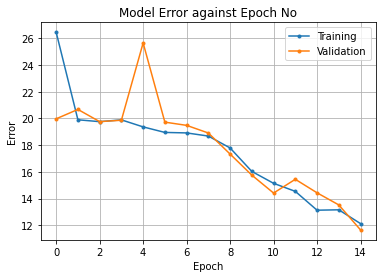

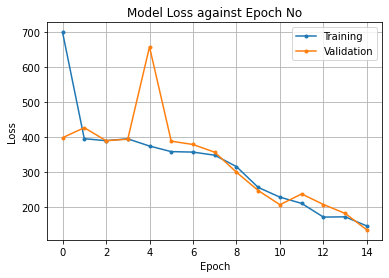

In [3]:
batchsize=16; epoch=15; lr=0.001
enc = autEncD('autEncD'); enc.cuda()
enc.load_state_dict(torch.load('saved/TrainingRuns/AutoEncTrainer/autEncD_b64_te15_lr0.001/model_epoch14'))

net = genSemiA('genSemiA', enc); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize=batchsize, preCalc=0)
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr)